# Brain 4 
Create a function to find what type of brain Brain 4 is.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/Unit 5 -Neuroscience/bird_dino_data.csv")

In [5]:
df.head()
df["Body Mass (g)"] = df["Body Mass (kg)"]*1000

In [6]:
df.head()

,Species ID,Bird vs Dino,Body Mass (kg),Olfactory bulbs (cm3),Cerebrum (cm3),Optic Lobes (cm3),Cerebellum (cm3),Brain Stem (cm3),Brain Volume (cm3),Body Mass (g)
0,1,B,0.02,0.009,1.53,0.20,0.16,0.06,1.96,20.0
1,2,B,1.26,0.006,16.81,2.84,1.70,0.68,22.04,1260.0
2,3,B,2.18,0.026,11.08,1.95,0.89,1.15,15.10,2180.0
3,4,D,0.25,0.050,0.41,0.16,0.09,0.12,0.83,250.0
4,5,B,0.01,0.003,1.57,0.20,0.34,0.08,2.19,10.0


Cerebrum to Brain Volume

In [7]:
dinos = df.loc[df["Bird vs Dino"] == "D"]
birds = df.loc[df["Bird vs Dino"] == "B"]

In [37]:
dinos_brain_ratio = dinos["Cerebrum (cm3)"]/dinos["Brain Volume (cm3)"]
Dinoctwavg = dinos_brain_ratio.mean()
print(Dinoctwavg)

0.4695339305450895


In [38]:
birds_brain_ratio = birds["Cerebrum (cm3)"]/birds["Brain Volume (cm3)"]
birdctwavg = birds_brain_ratio.mean()
print(birdctwavg)

0.6649507745281171


Brain Volume to Body Mass 

In [39]:
dfBirdBrain = df["Brain Volume (cm3)"].loc[df["Bird vs Dino"] == "B"]
dfBirdBody = df["Body Mass (g)"].loc[df["Bird vs Dino"] == "B"]
bird_ratio = dfBirdBrain/dfBirdBody
Birdbtbavg = bird_ratio.mean()
print(Birdbtbavg)

0.047832283820074345


In [40]:
dfDinoBrain = df["Brain Volume (cm3)"].loc[df["Bird vs Dino"] == "D"]
dfDinoBody = df["Body Mass (g)"].loc[df["Bird vs Dino"] == "D"]
dino_ratio = dfDinoBrain/dfDinoBody
Dinobtbavg = dino_ratio.mean()
print(Dinobtbavg)

0.0016106496539985663


In [12]:
#theropod: 10**(3.1854*np.log10(FL)-3.184)/1000

In [43]:
def braintobody(FL, brain_volume):
  bodyMass = 10**(3.1854*np.log10(FL)-3.184)
  btb_ratio = brain_volume/bodyMass
  if btb_ratio > Birdbtbavg:
    diff_bird_btb = btb_ratio - Birdbtbavg
  elif btb_ratio < Birdbtbavg:
   diff_bird_btb = Birdbtbavg - btb_ratio

  
  if btb_ratio > Dinobtbavg:
    diff_dino_btb = btb_ratio - Dinobtbavg
  elif btb_ratio < Dinobtbavg:
    diff_dino_btb = Dinobtbavg - btb_ratio

  if diff_bird_btb > diff_dino_btb:
    prediction_btb = "Our dinosaur is not an avian dinosaur."
  elif diff_bird_btb < diff_dino_btb:
    prediction_btb = "Our dinosaur is an avain dinosaur."
  return prediction_btb

In [42]:
def cerebrumtobrain(brain_volume, cerebrum_volume):
  cerebrum_to_whole = cerebrum_volume/brain_volume
  if cerebrum_to_whole > birdctwavg:
    diff_bird_ctb = cerebrum_to_whole - birdctwavg
  elif cerebrum_to_whole < avg_bird_ctb:
    diff_bird_ctb = birdctwavg - cerebrum_to_whole


  if cerebrum_to_whole > Dinoctwavg:
    diff_dino_ctb = cerebrum_to_whole - Dinoctwavg
  elif cerebrum_to_whole < Dinoctwavg:
    diff_dino_ctb = Dinoctwavg - cerebrum_to_whole

  if diff_bird_ctb > diff_dino_ctb:
   prediction_ctb = "Our dinosaur is not an avian dinosaur."
  elif diff_bird_ctb < diff_dino_ctb:
    prediction_ctb ="Our dinosaur is an avian dinosaur."
  return prediction_ctb

In [33]:
braintobody(353, 22.62)

'Our dinosaur is not an avian dinosaur.'

In [36]:
cerebrumtobrain(22.62, 9.52)

'Our dinosaur is not an avian dinosaur.'

In [14]:
our_dino_brain_ratio = 9.52/22.62
our_dino_btb_ratio = 22.62/(10**(3.1854*np.log10(353)-3.184))

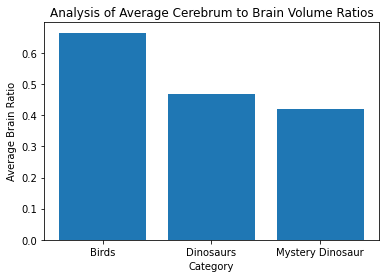

In [15]:
plt.bar([1,2,3],[avg_bird_ctb,avg_dino_ctb, our_dino_brain_ratio])
plt.xticks([1,2,3],labels=["Birds", "Dinosaurs", "Mystery Dinosaur"])
plt.title("Analysis of Average Cerebrum to Brain Volume Ratios")
plt.ylabel("Average Brain Ratio")
plt.xlabel("Category")
plt.show()

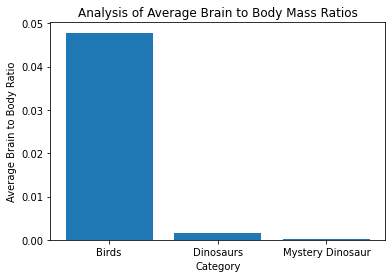

In [16]:
plt.bar([1,2,3],[bird_ratio_avg,dino_ratio_avg, our_dino_btb_ratio])
plt.xticks([1,2,3],labels=["Birds", "Dinosaurs", "Mystery Dinosaur"])
plt.title("Analysis of Average Brain to Body Mass Ratios")
plt.ylabel("Average Brain to Body Ratio")
plt.xlabel("Category")
plt.show()